# Proyecto: Tienda de video juegos *'Ice'*
El objetivo del proyecto es identificar patrones para determinar si un juego próximo a lanzarse tendrá exito. De esta manera se definirán criterios para propuestas prometedoras y proceder con la planificación de campañas publicitarias. Para esto se utilizarán datos históricos con información de juegos lanzados al mercado, años de lanzamientos, ventas por región, plataformas, géneros y reseñas por parte de los usuarios y expertos.

## Preparación de los datos

### Importación de librerías

In [4]:
#Importamos la librerías necesarias
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Lectura del archivo

In [5]:
#Lectura del archivo '.csv' para generar el dataframe
df=pd.read_csv('dataset/games.csv')
#df=pd.read_csv('/datasets/games.csv')
#Se utiliza el método '.info()' para obtener la información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A partir de la información general obtenida, se puede observar que casi todas las columnas tienen valores ausentes, a excepción de las columnas con las ventas por región y la columna 'platform'. Respecto al tipo de datos de cada columna, se debe convertir el tipo de dato de la columna 'user_score' dado que es información numérica.

### Nombre de las columnas con formato *snake_case*
Siguiendo la regla 'snake_case', todos los nombres de las columnas deben estar en minúsculas y debe haber guiones bajos (_) entre las palabras que componen los nombres.

In [6]:
#Los nombres de las columnas actuales se pasan a minúsculas usando el método '.lower()'
new_cols=df.columns.str.lower()
#Se asignan los nombres de las columnas formateados al dataframe
df.columns=new_cols
#Se muestran los nombres de las columnas cumpliendo la regla 'snake_case'
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Luego del procesamiento, se verifica que todos los nombres de las columnas cumplen la regla 'snake_case'.

### Cambios en los tipos de datos
Para este dataframe se considera necesario cambiar el tipo de dato de la columna 'user_score'. Esta columna debe tener datos del tipo numérico de tal manera que se puedan realizar operaciones y calcular estadísticas. Adicionalmente, se verifica la existencia de valores ausentes y otras variaciones que puedan obstaculizar el análisis de los datos.

In [7]:
#Se debe cambiar el tipo de dato de la columna 'user_score' a numérico
#Se utiliza el método '.unique()' para ver los valores existentes en la columna
df["user_score"].unique()
#Se determina que en la columna exite el valor 'tbd'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Se observa la existencia de un registro de dato 'tbd'. Esta variación dificultará la conversión de los datos al tipo numérico. Para este caso, usaremos el método '.to_numeric' que forzará los valores que no puedan ser convertidos al tipo numérico a ser definidos como un valor ausente.

In [8]:
#Se utiliza el método '.to_numeric' para cambiar el tipo de dato a numérico
#Especificando el parámetro 'errors="coerce"' nos aseguramos que los valores que no
#puedan ser convertidos a numéricos se conviertan en valores ausentes.
df["user_score"]=pd.to_numeric(df["user_score"], errors="coerce")
df["user_score"].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Se puede ver que los registros con 'tbd' han sido convertidos en valores ausentes. El resto de registros han sido exitosamente convertidos a datos del tipo numérico.

### Duplicados
Verificamos que no existan registros duplicados explícitos. Adicionalmente, se comprobará que no existan duplicados implícitos, es decir, juegos con el mismo nombre pero escritos con un uso de mayúsculas y minúsculas diferentes.

In [9]:
#Usando que el método '.duplicated()' verificamos que no hay duplicados explícitos
df.duplicated().sum()

np.int64(0)

In [10]:
#Se crea una copia del dataframe con el método '.copy()'
df_lowered=df.copy()
#Se crea una columna con los nombres en minúsculas usando el método ".lower()"
df_lowered["name_lower"]=df_lowered["name"].str.lower()
#Se elimina la columna "name" original usando el método ".drop()"
df_lowered=df_lowered.drop("name", axis="columns")
#Se verifica que no hay duplicados usando el método ".duplicated()"
df_lowered.duplicated().sum()

np.int64(0)

Se comprueba que no existen duplicados de ningún tipo en el dataframe.

### Valores ausentes
Anteriormente se había confirmado que existen valores ausentes en el dataframe. Para la columna 'name' y 'genre' existen solo dos registros con valores ausentes.  

In [11]:
#Usando el método '.isna()' comprobamos que existen dos registros con valores ausentes
#en la columna 'name'
df[df["name"].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
#Usando el método '.fillna()' se reemplazan los valores ausentes por 'Unknown'
df["name"].fillna("Unknown", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5260\252136224.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Unknown", inplace=True)


In [13]:
#Usando el método '.isna()' comprobamos que existen dos registros con valores ausentes
#en la columna 'genre'
df[df["genre"].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#Usando el método '.fillna()' se reemplazan los valores ausentes por 'Unknown'
df["genre"].fillna("Unknown", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5260\3538098906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genre"].fillna("Unknown", inplace=True)


* Se confirma que los dos registros con valores ausentes para las columnas 'name' y 'genre' coinciden. Estos dos registros podrían ser eliminados, dado que tienen valores ausentes en muchas columnas. Sin embargo, dado que son registros de más de 20 años seguramente no se tendrán en cuenta en el análsis posterior.

* Para las columnas 'user_score', 'critic_score' y 'rating'; los valores ausentes pueden llegar a representar casi el 50% de los registros. En este caso, el reemplazarlos sin ningún criterio justificado podría afectar significativamente el análisis posterior.

* Para la columna 'year_of_release', existen alrededor de 300 registros con valores ausentes. Posteriormente se identificará el número de juegos lanzados por año, para determinar si reemplazar esta cantidad puede tener efectos significativos en el análisis de tendencias por año.  

* Como vimos en el caso de las columnas 'name' y 'genre', los registros con valores ausentes en la columna 'year_of_release' pueden corresponder a juegos antiguos. Tendríamos que evaluar nombre por nombre, y determinar si son juegos recientes cuya información no fue ingresada correctamente.  

* En el caso de las columnas 'critic_score', 'user_score' y 'rating', los valores ausentes pueden deberse también a juegos antiguos que no cuentan con registros en estos apartados. Otra posible causa, es que sean juegos muy recientes que no han sido evaluados o clasificados completamente teniendo en cuenta la cantidad de registros con valores ausentes.

### Cálculo de ventas totales
Se crea una columna adicional a partir del cálculo de las ventas totales para cada registro teniendo en cuenta las ventas en cada región e información de otras ventas disponibles.

In [15]:
#Operando numéricamente las columnas con información de ventas, podemos obtener
#una columna con las ventas totales
df["total_sales"]=df["na_sales"]+df["eu_sales"]+df["jp_sales"]+df["other_sales"]

## Análisis de datos

### Número de juegos lanzados por año
A continuación vamos a determinar el número de juegos lanzados cada año.

In [16]:
#Utilizando el método '.groupby()' se agrupa la información por año de lanzamiento
#Procedemos a contar el número de juegos lanzados en cada año
#Se muestra el número de juegos lanzados en los últimos 15 años
df_year=df.groupby("year_of_release")["name"].count().tail(15)
df_year

year_of_release
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Para visualizar mejor la información, vamos a generar un gráfico de barras.

Text(0.5, 1.0, 'Número de juegos lanzados en cada año:\nEn los últimos 5 años se han lanzado al menos 500 juegos')

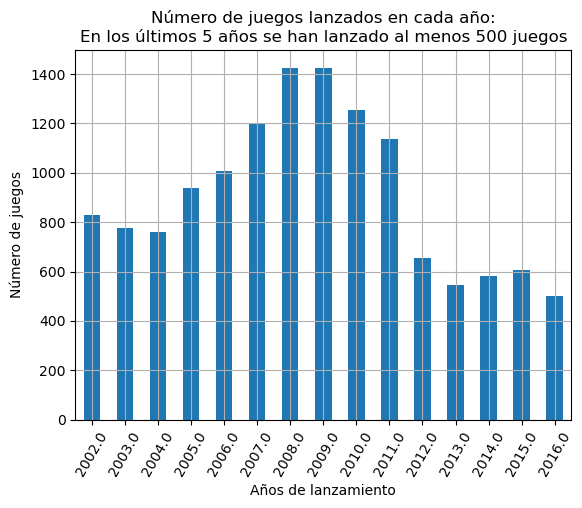

In [17]:
#Se genera un gráfico de barras
df_year.plot(xlabel="Años de lanzamiento", ylabel="Número de juegos",  kind="bar", rot=60, grid=True)
#Se define el título
plt.title("Número de juegos lanzados en cada año:\nEn los últimos 5 años se han lanzado al menos 500 juegos")

Al enfocarnos en los últimos 15 años podemos ver que entre los años 2006 y 2011 se lanzaban más de 1000 juegos al año. Se puede observar que en los últimos 5 año el número de juegos se encuentra entre 500 y 600 juegos en promedio.

### Ventas totales en cada plataforma
Procederemos a identificar las plataformas con mayor cantidad de ventas totales.

In [18]:
#Se utiliza el método '.groupby()' para agrupar la información por plataforma
#Se calculan las ventas totales en cada plataforma
#Se muestran las 6 plataformas con la mayor cantidad de ventas
df_plats_g=df.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(10)
#Para facilitar el manejo de la información del dataframe resultante, se restablece
#el index por defecto, sin perder la información de ventas totales en cada plataforma
df_plats_r=df_plats_g.reset_index()
#Se almacena los nombres de las plataformas con las mejores ventas
df_platfs=df_plats_r["platform"].head(6)
#Se muestra el dataframa resultante
df_plats_r

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Para visualizar mejor la información, vamos a generar un gráfico de barras.

Text(0.5, 1.0, "Ventas totales de cada plataforma:\nLa plataforma 'PS2' supera los 1200 Millones USD")

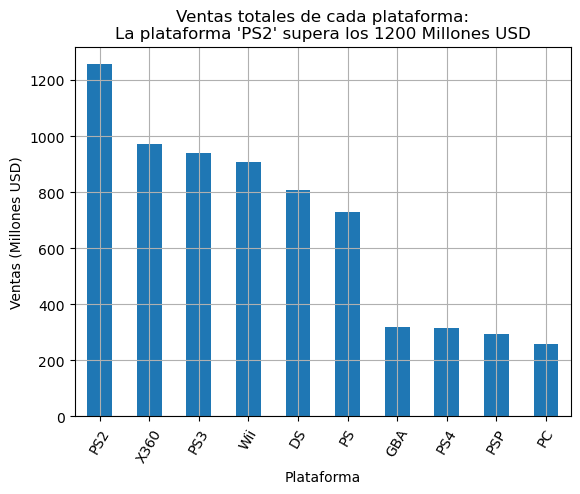

In [19]:
#Se genera un gráfico de barras
df_plats_g.plot(xlabel="Plataforma",ylabel="Ventas (Millones USD)",  kind="bar", rot=60, grid=True, legend=False)
#Se define el título
plt.title("Ventas totales de cada plataforma:\nLa plataforma 'PS2' supera los 1200 Millones USD")

En este caso, sería prudente evaluar las ventas totales de cada plataforma en cada año. De esta manera podemos ver las tendencias más actuales de ventas en las plataformas, considerando el rango de los años es posible que hayan plataformas para las que ya no se estén lanzando juegos. Por lo tando deberíamos concentrarnos en las plataformas más recientes con mayor cantidad de ventas.

### Ventas totales anuales para cada plataforma
Para las 6 plataformas con mayor cantidad de ventas totales, vamos a construir la distribución de ventas para cada año.

In [20]:
#plat_sel=["PS2", "X360", "PS3", "Wii", "DS", "PS"]
#Utilizamos el método '.query()' para filtrar el dataframe con la información relacionada
#con las plataformas con la mayor cantidad de ventas.
#Se especifica las columnas de interés que tendrá el dataframa resultante
df_sel=df.query('platform in @df_platfs')[["platform", "year_of_release", "total_sales"]]
#Mediante el método '.groupby()' se agrupa la información de cada plataforma por año
#Procedemos a calcular las ventas totales anuales de cada plataforma
df_sel_g=df_sel.groupby(["platform", "year_of_release"])["total_sales"].sum()
#Para facilitar el manejo de la información del dataframe resultante, se restablece
#el index por defecto, sin perder la información de ventas totales en cada plataforma
df_sel_g=df_sel_g.reset_index()
#Se presenta un muestreo del dataframa resultante
df_sel_g.sample(10)

,platform,year_of_release,total_sales
37,PS3,2010.0,142.17
12,PS,1995.0,35.96
57,X360,2007.0,95.41
11,PS,1994.0,6.03
16,PS,1999.0,144.53
64,X360,2014.0,34.74
26,PS2,2005.0,160.66
25,PS2,2004.0,211.81
18,PS,2001.0,35.59
6,DS,2009.0,119.54


Para tener una mejor visualización de los resultados, vamos a usar gráficos de barras para mostrar las distribuciones de ventas totales anuales para cada plataforma.

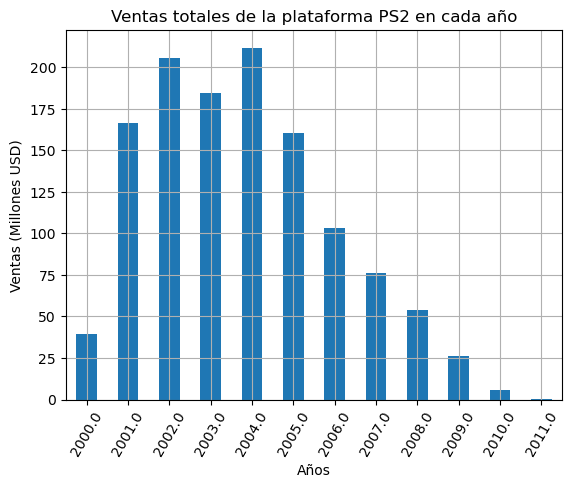

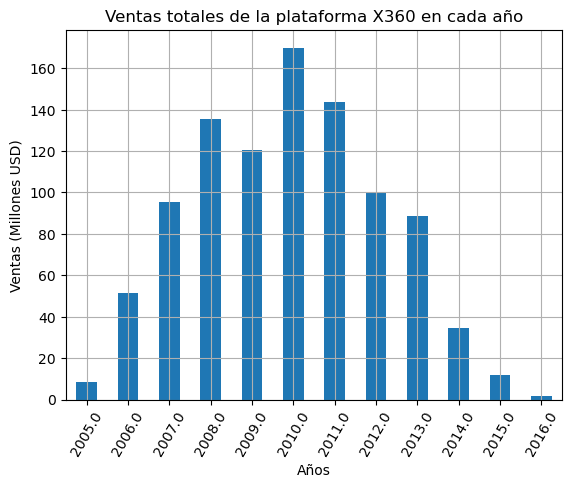

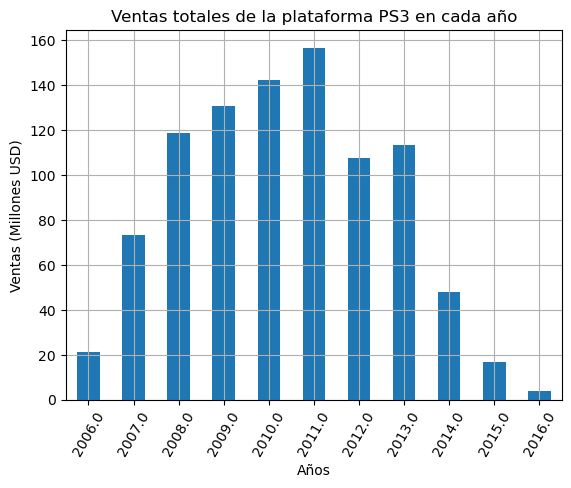

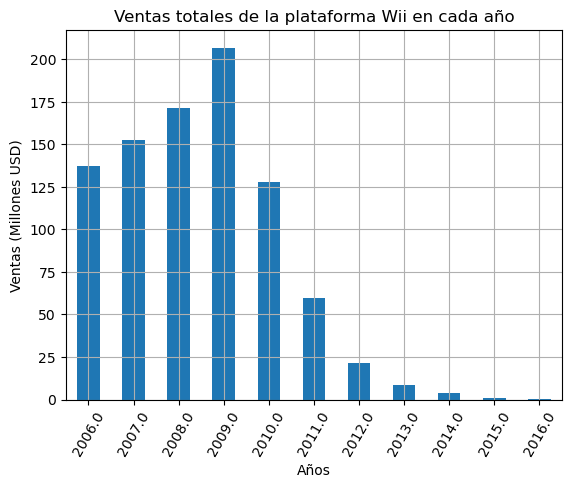

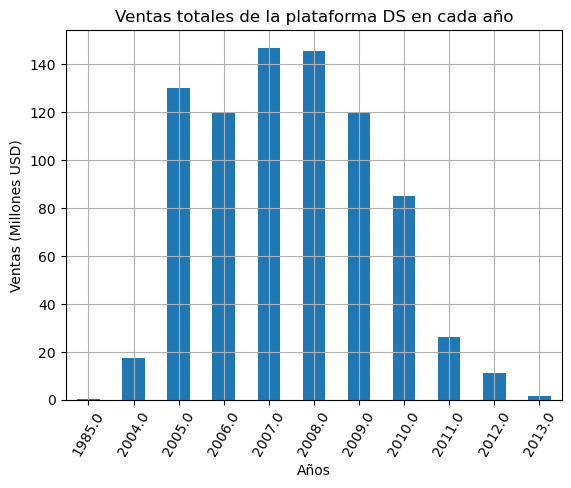

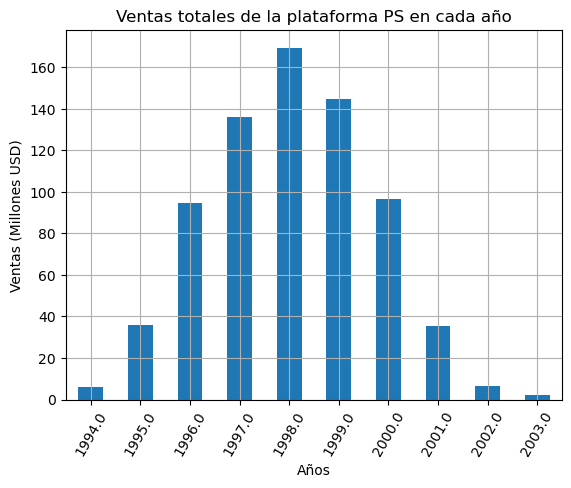

In [21]:
#Se aplica un ciclo for para las plataformas con mayor cantidad de ventas
for plat in df_platfs:
  #Se crea un dataframe con la información de una plataforma específica
  df_plat=df_sel_g[["year_of_release","total_sales"]][df_sel_g["platform"]==plat]
  #Se define la columna "year_of_release" como el index del dataframe para facilitar
  #la generación de la gráfica
  df_plat.set_index("year_of_release", inplace=True)
  #Se procede a generar un gráfico de barras con las ventas por año para cada plataforma
  df_plat.plot(xlabel="Años", ylabel="Ventas (Millones USD)", kind="bar", rot=60, grid=True, legend=False,
               title=f"Ventas totales de la plataforma {plat} en cada año")

Al observar los comportamientos de cada plataforma a lo largo de los años, podemos ver que la tendencia es que las ventas crezcan sostenidamente en promedio durante los siguientes 5 años después de ser lanzada. Luego de alcanzar un máximo, las ventas decrecen en los siguientes 5 años. Si nos fijamos en la plataforma 'PS2' que anteriormente registró el mayor número de ventas totales, despúes del año 2011 no se registran ventas de juegos para esa plataforma. Esto se debe a que constantemente aparecen nuevas plataformas o se reemplazan con nuevas versiones. Este caso, se puede ver que también aparece la 'PS3', cuyas ventas también disminuyen seguramente por la aparición de una nueva versión 'PS4'.

### Análisis de los últimos 5 años
Teniendo en cuenta el análisis anterior, se decide estudiar las tendencias en la venta de juegos en los 5 últimos años. El dataframe se filtrará para tener solo la información disponible entre los años 2012 y 2016.

In [22]:
#Se filtra el dataframe con la información de los últimos 5 años
df_sig=df[(df["year_of_release"]>=2012)]
#Se muestra la información general del dataframe filtrado
df_sig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   float64
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(8), object(4)
memory usage: 293.1+ KB


Nuevamente, contamos con valores ausentes en las columnas 'critic_score', 'user_score' y 'rating'. El resto de las columnas no poseen valores ausentes.

In [23]:
#Se utiliza el método '.groupby()' para agrupar la información de cada plataforma
#Se calculan las ventas totales de cada plataforma
#Se muestra la información de las 5 plataformas con la mayor cantidad de ventas
df_pf_g=df_sig.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
#Para facilitar el manejo de la información del dataframe resultante, se restablece
#el index por defecto, sin perder la información de ventas totales en cada plataforma
df_pf_r=df_pf_g.reset_index()
#Se almacena el nombre de las 5 plataformas con mayor cantidad de ventas
platforms=df_pf_r["platform"].head()
#Se muestra el dataframa resultante
df_pf_r

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Decidimos generar un gráfico para visualizar los resultados.

Text(0.5, 1.0, 'Ventas totales de cada plataforma en los últimos 5 años:\nSe identifican 5 plataformas líderes en ventas')

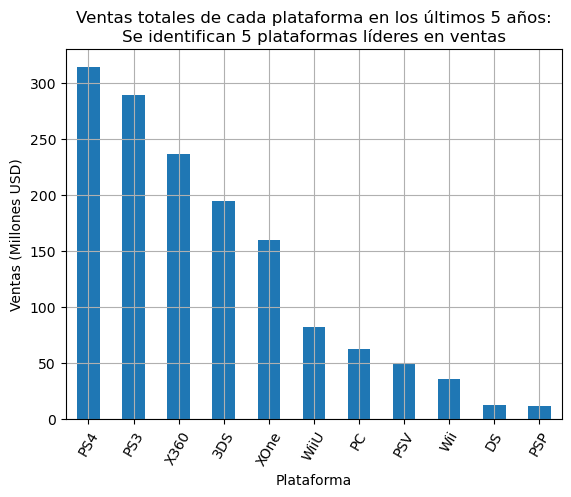

In [24]:
#Se genera un gráfico de barras
df_pf_g.plot(xlabel="Plataforma", ylabel="Ventas (Millones USD)", kind="bar", rot=60, grid=True)
#Se define el título del gráfico
plt.title("Ventas totales de cada plataforma en los últimos 5 años:\nSe identifican 5 plataformas líderes en ventas")

Se puede observar las 5 plataformas que actualmente son líderes en ventas. De las plataformas con mayores ventas presentadas anteriormente, solo se mantiene la plataforma 'PS3'. Como habíamos comentado, muchas de las plataformas son descontinuadas o reemplazadas. Nuevamente, analizaremos con más detalle las ventas totales anuales de cada una de estas plataformas.

### Plataformas líderes en ventas
A continuación, vamos el comportamiento de las ventas de las plataformas líderes en ventas durante los últimos 5 años.

In [25]:
#platform_sel=["PS4", "PS3", "X360", "3DS", "XOne"]
#Utilizamos el método '.query()' para filtrar el dataframe con la información de
#las plataformas con la mayor cantidad de ventas.
#Se especifica las columnas de interés que tendrá el dataframa resultante
df_sig_q=df_sig.query('platform in @platforms')[["platform", "year_of_release", "total_sales"]]
#Mediante el método '.groupby()' se agrupa la información de cada plataforma por año
#Procedemos a calcular las ventas totales anuales de cada plataforma
df_sig_g=df_sig_q.groupby(["platform", "year_of_release"])["total_sales"].sum()
#Para facilitar el manejo de la información del dataframe resultante, se restablece
#el index por defecto, sin perder la información de ventas totales en cada plataforma
df_sig_g=df_sig_g.reset_index()
#Se presenta una muestra del dataframe resultante
df_sig_g.sample(10)

,platform,year_of_release,total_sales
10,PS4,2013.0,25.99
0,3DS,2012.0,51.36
18,X360,2016.0,1.52
20,XOne,2014.0,54.07
7,PS3,2014.0,47.76
15,X360,2013.0,88.58
13,PS4,2016.0,69.25
2,3DS,2014.0,43.76
9,PS3,2016.0,3.60
1,3DS,2013.0,56.57


Vamos a crear un gráfico para visualizar los resultados obtenidos.

In [26]:
#Se crea una lista para guardar los dataframes filtrados
df_plat_year=[]
#Se aplica un ciclo for para las plataformas con mayor cantidad de ventas
for platform in platforms:
  #Se crea un dataframe con la información de una plataforma específica
  df_platform=df_sig_g[["year_of_release","total_sales"]][df_sig_g["platform"]==platform]
  #Se define la columna "year_of_release" como el index del dataframe para facilitar
  #la generación de la gráfica
  df_platform.set_index("year_of_release", inplace=True)
  #Se guarda el dataframe generado en la lista
  df_plat_year.append(df_platform)

In [27]:
#Se utiliza un ciclo for para recorrer la lista
for element in range(len(df_plat_year)):
  #Se crea un dataframe base con el primer elemento
  if element==0:
    df_plat_year_c=df_plat_year[element]
  #Los demás dataframes se concatenan al base
  else:
    df_plat_year_c=pd.concat([df_plat_year_c,df_plat_year[element]], axis="columns")
#Se reemplazan los valores ausentes con cero.
df_plat_year_c.fillna(0, inplace=True)
#Se asignan los nombres de las plataformas para facilitar la identificación
df_plat_year_c.columns=[platforms]
#Se organiza el dataframe respecto al index
df_plat_year_c=df_plat_year_c.sort_index()
#Se muestra el dataframe resultante
df_plat_year_c

platform,PS4,PS3,X360,3DS,XOne
year_of_release,,,,,
2012.0,0.00,107.36,99.74,51.36,0.00
2013.0,25.99,113.25,88.58,56.57,18.96
2014.0,100.00,47.76,34.74,43.76,54.07
2015.0,118.90,16.82,11.96,27.78,60.14
2016.0,69.25,3.60,1.52,15.14,26.15


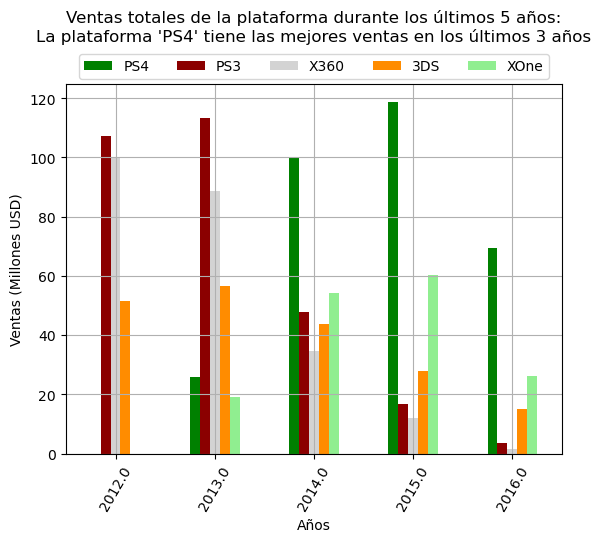

In [28]:
#Se procede a generar un gráfico de barras con las ventas por año para cada plataforma
df_plat_year_c.plot(xlabel="Años", ylabel="Ventas (Millones USD)", kind="bar", rot=60, grid=True,
                    color=["green", "darkred", "lightgrey", "darkorange", "lightgreen"])
#Se define el título del gráfico
plt.title("Ventas totales de la plataforma durante los últimos 5 años:\nLa plataforma 'PS4' tiene las mejores ventas en los últimos 3 años\n\n")
#Se configura la leyenda del gráfico
plt.legend(["PS4", "PS3", "X360", "3DS", "XOne"], loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=len(platforms))

Podemos observar como las ventas totales de las plataformas 'PS4', 'X360' y '3DS' empiezan a disminuir notablemente en los últimos 3 años. Para las plataformas 'XOne' y 'PS4', las ventas también disminuyeron pero se mantienen sobre los 20 millones de USD. Particularmente, la plataforma 'PS4' supera los 60 millones de USD en los últimos 3 años. También podemos explicar la disminución de ventas en algunas plataformas por la aparición de nuevas versiones. 'PS4' aparece para reemplazar a 'PS3', igualmente 'X360' es reemplazada por 'XOne'.

### Distribuciones de las ventas en cada plataforma
Ahora procederemos a analizar la distribución de las ventas totales para cada una de las plataformas líderes en ventas durante los últimos 5 años. Adicionalmente, calcularemos el promedio y la varianza de las ventas totales para cada una en ese tiempo.

(0.0, 2.5)

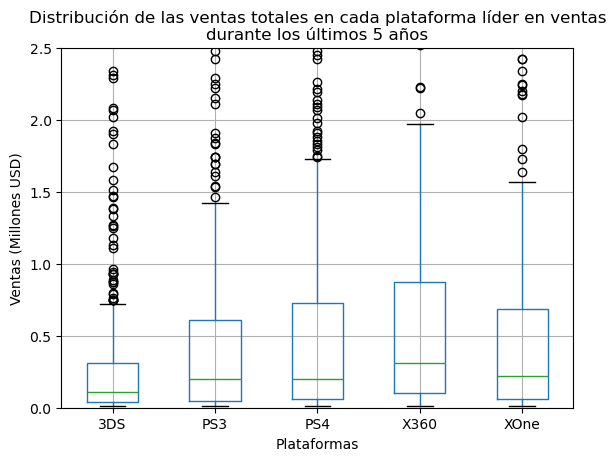

In [29]:
#Se utiliza el método '.query()' para filtrar la información de las plataformas líderes en venta
df_sig_filtered=df_sig.query('platform in @platforms')[["platform","total_sales"]]
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
df_sig_filtered.boxplot(column="total_sales", by="platform", xlabel="Plataformas", ylabel="Ventas (Millones USD)")
#Se define el título principal
plt.suptitle("Distribución de las ventas totales en cada plataforma líder en ventas\ndurante los últimos 5 años")
#Se define el título secundario
plt.title("")
plt.ylim(0,2.5)

C:\Users\User\AppData\Local\Temp\ipykernel_5260\467118095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="platform", y="total_sales", data=df_sig_filtered, palette="PRGn")


(0.0, 2.5)

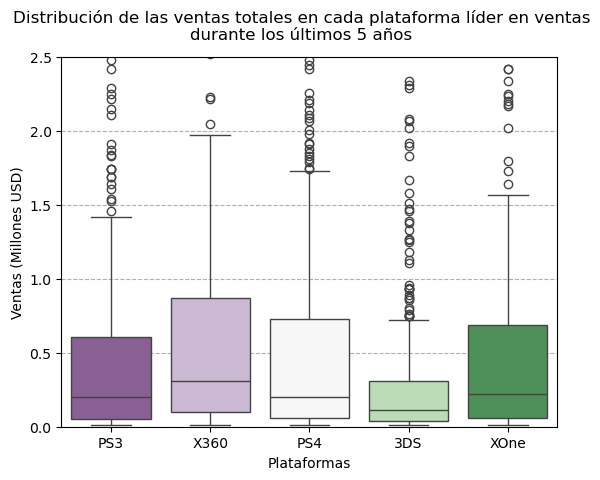

In [30]:
#Se genera un gráfico de la columna 'total_sales' agrupado por 'platform'
sns.boxplot(x="platform", y="total_sales", data=df_sig_filtered, palette="PRGn")
#Se define la etiqueta del eje x
plt.xlabel("Plataformas")
#Se define la etiqueta del eje y
plt.ylabel("Ventas (Millones USD)")
#Se define el título principal
plt.suptitle("Distribución de las ventas totales en cada plataforma líder en ventas\ndurante los últimos 5 años")
#Se define el título secundario
plt.title("")
#Se define la cuadrícula
plt.grid(True, axis="y", linestyle="--", alpha=1.0)
plt.ylim(0,2.5)

Se puede observar la existencia de valores atípicos en cada una de las distribuciones. Podemos afirmar que las distribuciones se encuentran fuertemente sesgadas a la derecha. En las distribuciones la caja con sus bigotes se encuentra entre 0 y 2 millones de USD. Las cajas parecen mantener la misma proporción para cada una de las distribuciones presentadas. Los promedios de las ventas totales para cada una de las plataformas es diferente igual que las varianzas. Podríamos decir que hay distribuciones con un mayor grado de dispersión, pero visualmente no se aprecia una diferencia notable en las distribuciones. Por lo tanto, se necesita más información estadística y pruebas para verificar que hay diferencia significativa entre las ventas totales de las plataformas evaluadas.  


### Relación entre las reseñas y las ventas totales
Vamos a deteminar si las reseñas que hacen los usuarios y los críticos, tienen efecto sobre las ventas totales de los juegos en la plataforma 'PS4', la plataforma con la mayor cantidad de ventas en los últimos 3 años.

<Axes: title={'center': 'Relación entre el puntaje de los usuarios y las ventas totales:\nCorrelación prácticamente nula=-0.03'}, xlabel='Puntaje de los usuarios', ylabel='Ventas (Millones USD)'>

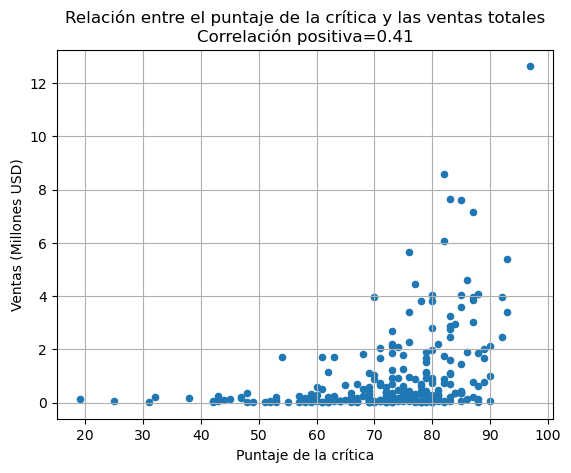

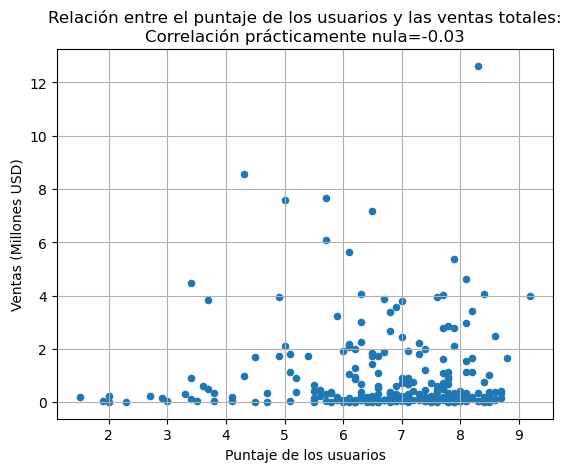

In [31]:
#Se selecciona la plataforma 'PS4'
df_ps4=df_sig[df_sig["platform"]=="PS4"]
#Se crea un dataframe con las columnas de interés
df_ps4_score=df_ps4[["critic_score", "user_score", "total_sales"]]
#Se calcula el coeficiente de correlación entre los puntajes de la crítica y las ventas totales
cor_critic_sales=df_ps4_score["critic_score"].corr(df_ps4_score["total_sales"])
#Se genera un gráfico de dispersión para los puntajes de la crítica y las ventas totales
df_ps4_score.plot(x="critic_score", y="total_sales", xlabel="Puntaje de la crítica", ylabel="Ventas (Millones USD)",kind="scatter", grid=True,
                   title="Relación entre el puntaje de la crítica y las ventas totales\nCorrelación positiva={:.2f}".format(cor_critic_sales))
#Se calcula el coeficiente de correlación entre los puntajes de los usuarios y las ventas totales
cor_user_sales=df_ps4_score["user_score"].corr(df_ps4_score["total_sales"])
#Se genera un gráfico de dispersión para los puntajes de la crítica y las ventas totales
df_ps4_score.plot(x="user_score", y="total_sales", xlabel="Puntaje de los usuarios", ylabel="Ventas (Millones USD)",kind="scatter", grid=True,
                   title="Relación entre el puntaje de los usuarios y las ventas totales:\nCorrelación prácticamente nula={:.2f}".format(cor_user_sales))

* Para el caso de los puntajes de los críticos y las ventas totales, el coeficiente obtenido indicada una correlación positiva notable. En la gráfica de dispersión, es posible apreciar una ligera tendencia lineal. Respecto a la relación entre los puntajes de los usuarios y las ventas totales, el coeficiente obtenido indicada una correlación negativa prácticamente nula. En la gráfica de dispersión, no es posible apreciar ninguna tendencia.  

* A partir de esto, se podría afirmar que las reseñas de los profesionales tienen cierta influencia en los juegos que se compran. Es decir, los usuarios revisan las calificaciones y comentarios antes de comprar juegos. Por otro lado, parece que las reseñas de los usuarios no tienen ningún efecto en la compra de juegos.


### Juegos en diferentes plataformas
En este punto, teniendo en cuenta los 5 juegos con mayor cantidad de ventas, vamos a ver cómo se distribuyen las ventas en cada una de las plataformas en las que se encuentran disponibles.

In [32]:
#Mediante el método '.groupby()' se agrupa la información de cada juego
#Se calculan las ventas totales de cada juego
#Se muestran los 5 juegos con mayor cantidad de ventas
df_games=df_sig.groupby("name")["total_sales"].sum().sort_values(ascending=False).head()
#Para facilitar el manejo de la información del dataframe resultante, se restablece
#el index por defecto, sin perder la información de ventas totales en cada plataforma
df_games=df_games.reset_index()
#Se almacenan los nombres de los 5 juegos con mayor cantidad de ventas
names=df_games["name"]
#Se muestra el dataframe resultante
df_games

,name,total_sales
0,Grand Theft Auto V,56.58
1,Call of Duty: Black Ops II,29.40
2,Call of Duty: Ghosts,27.39
3,Call of Duty: Black Ops 3,25.67
4,Minecraft,24.16


In [33]:
#Se crea una lista para guardar cada dataframe obtenido
df_game_plat=[]
#Se aplica un ciclo for para las juegos con mayor cantidad de ventas
for name in names:
  #Se crea un dataframe con la información de un juego en específico
  df_filtered=df_sig[df_sig["name"]==name]
  #Se muestra el nombre del juego
  print(f"Juego: {name}")
  #Mediante el método '.groupby()' se agrupa la información de las plataformas
  #Se calculan las ventas totales en cada plataforma para el juego en específico
  df_games_g=df_filtered.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head()
  #Para facilitar el manejo de la información del dataframe resultante, se restablece
  #el index por defecto, sin perder la información de ventas totales en cada plataforma
  df_games_r=df_games_g.reset_index()
  #Se agrega el dataframe a la lista
  df_game_plat.append(df_games_r)
  #Se muestra el dataframe resultante
  print(df_games_g,"\n")

Juego: Grand Theft Auto V
platform
PS3     21.05
X360    16.27
PS4     12.62
XOne     5.47
PC       1.17
Name: total_sales, dtype: float64 

Juego: Call of Duty: Black Ops II
platform
PS3     13.79
X360    13.68
PC       1.52
WiiU     0.41
Name: total_sales, dtype: float64 

Juego: Call of Duty: Ghosts
platform
X360    10.24
PS3      9.36
PS4      3.83
XOne     2.92
PC       0.69
Name: total_sales, dtype: float64 

Juego: Call of Duty: Black Ops 3
platform
PS4     14.63
XOne     7.39
X360     1.70
PS3      1.69
PC       0.26
Name: total_sales, dtype: float64 

Juego: Minecraft
platform
X360    9.18
PS3     5.27
PS4     4.32
XOne    2.76
PSV     1.96
Name: total_sales, dtype: float64 



Vamos a graficar los resultados para tener una mejor visualización.

In [34]:
#Se utiliza un ciclo for para recorrer la lista
for element in range(len(df_game_plat)):
  #Se crea un dataframe base con el primer elemento
  if element==0:
    df_game_plat_m=df_game_plat[element]
  #Los demás dataframes se concatenan al base
  else:
    df_game_plat_m=df_game_plat_m.merge(df_game_plat[element], on="platform", how="outer",suffixes=(element, element+1))
#Se define la columna 'platform' como index
df_game_plat_m=df_game_plat_m.set_index("platform")
#Se asignan nombres a la columnas para facilitar su identificación
df_game_plat_m.columns=[names]
#Se reemplazan los valores ausentes con cero.
df_game_plat_m.fillna(0,inplace=True)
#Se muestra el dataframe resultante
df_game_plat_m

name,Grand Theft Auto V,Call of Duty: Black Ops II,Call of Duty: Ghosts,Call of Duty: Black Ops 3,Minecraft
platform,,,,,
PC,1.17,1.52,0.69,0.26,0.00
PS3,21.05,13.79,9.36,1.69,5.27
PS4,12.62,0.00,3.83,14.63,4.32
PSV,0.00,0.00,0.00,0.00,1.96
WiiU,0.00,0.41,0.00,0.00,0.00
X360,16.27,13.68,10.24,1.70,9.18
XOne,5.47,0.00,2.92,7.39,2.76


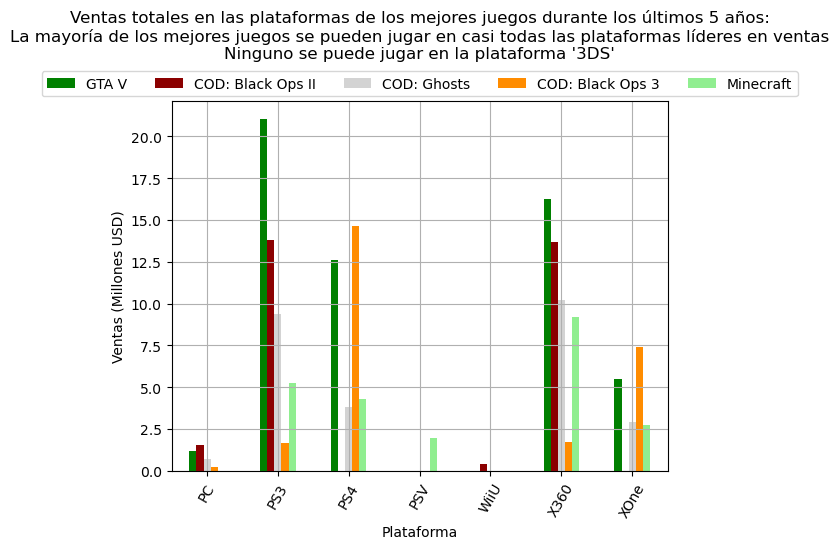

In [35]:
#Se procede a generar un gráfico de barras con las ventas por año para cada plataforma de los mejores juegos
df_game_plat_m.plot(xlabel="Plataforma", ylabel="Ventas (Millones USD)", kind="bar", rot=60, grid=True,
                    color=["green", "darkred", "lightgrey", "darkorange", "lightgreen"])
#Se define el título del gráfico
plt.title("Ventas totales en las plataformas de los mejores juegos durante los últimos 5 años:\nLa mayoría de los mejores juegos se pueden jugar en casi todas las plataformas líderes en ventas\nNinguno se puede jugar en la plataforma '3DS'\n\n")
#Se configura la leyenda del gráfico
plt.legend(["GTA V", "COD: Black Ops II", "COD: Ghosts", "COD: Black Ops 3", "Minecraft"],
           loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=len(platforms))

Podemos observar que en 3 de los 5 juegos con mayores ventas en los últimos 5 años encontramos 4 de las plataformas líderes en ventas: 'PS4', 'XOne', 'PS3' y 'X360'. Aparentemente ninguno de estos juegos se puede jugar en la plataforma '3DS'. En el caso del juego, 'Call of Duty: Black Ops 2', este juego debió ser lanzado antes de que aparecieran las plataformas 'PS4' y 'XOne'.

###Distribución de los juegos por género###
A continuación, determinaremos la cantidad de juegos por género en los 5 últimos años.

<Axes: title={'center': 'Número de juegos por cada género en los últimos 5 años:\nLa mayoría de los juegos pertenecen al género de Acción'}, xlabel='Género', ylabel='N° de juegos'>

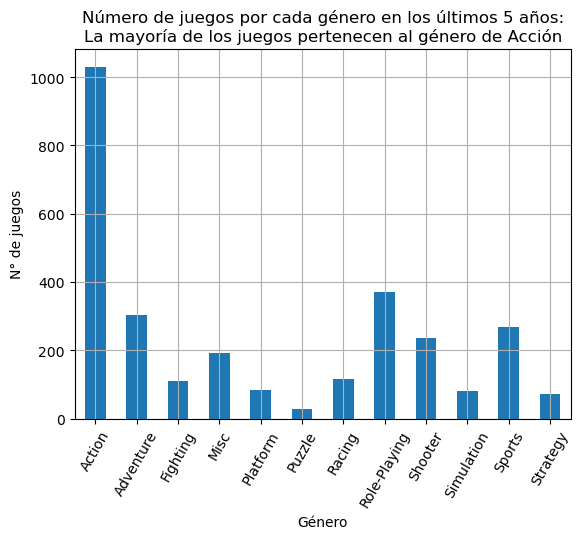

In [36]:
#Se utiliza el método '.groupby()' para agrupar la información de los géneros
#Se cuenta el número de juegos por género
df_sig_genre=df_sig.groupby("genre")["name"].count()
#Se genera un gráfico de barras para visualizar el dataframe resultante
df_sig_genre.plot(xlabel="Género", ylabel="N° de juegos",kind="bar", grid=True, rot=60,
                  title="Número de juegos por cada género en los últimos 5 años:\nLa mayoría de los juegos pertenecen al género de Acción")

Podemos notar claramente que la mayoría de los juegos pertenecen al género de acción. También podemos observar que hay otros géneros que cuentan con al menos 200 juegos como como Aventura, Juegos de Rol, Deportes y 'Shooter' .

### Ventas totales en cada género
Ahora vamos a determinarlas ventas totales de cada uno de los géneros durante los 5 últimos años.

<Axes: title={'center': "Ventas totales por cada género en los últimos 5 años:\nLos juegos de los géneros de Acción y 'Shooter' tienen la mayor cantidad de ventas"}, xlabel='Género', ylabel='Ventas (Millones USD)'>

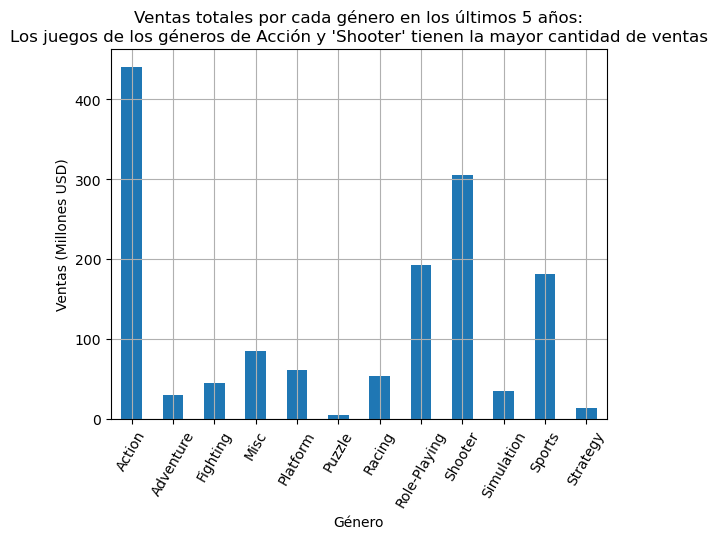

In [37]:
#Se utiliza el método '.groupby()' para agrupar la información de los géneros
#Se calculan las ventas totales de cada género
df_genre_sales=df_sig.groupby("genre")["total_sales"].sum()
#Se genera un gráfico de barras para visualizar el dataframe resultante
df_genre_sales.plot(xlabel="Género", ylabel="Ventas (Millones USD)",kind="bar", grid=True, rot=60,
                  title="Ventas totales por cada género en los últimos 5 años:\nLos juegos de los géneros de Acción y 'Shooter' tienen la mayor cantidad de ventas")

Como esperábamos la mayor cantidad de ventas totales pertenece a los juegos del género de Acción, correspondiente con la cantidad de juegos bajo este género. En ese mismo orden de ideas, teniendo en cuenta los resultados del análisis anterior, otros géneros que logran ganancias significativas son Juegos de Rol, 'Shooter' y Deportes. La única excepción es el género de Aventuras, donde el tener alrededor 300 juegos, no representó que las ventas superaran los 50 millones de USD.

## Perfil de usuario por región
En esta sección vamos a realizar una análisis más detallado de las tendencias por región en los últimos 5 años. Las regiones que tendremos en cuenta son Norte América, Europa y Japón.  

### Top 5 Plataformas en cada región
Primero, identificaremos las cinco plataformas con mayor cantidad de ventas en cada región durante los 5 últimos años.

In [38]:
#Se crea un diccionario con los nombres de las regiones y el nombre de la columna con las ventas
#de la región de interés
regions={"North America":"na_sales", "Europe":"eu_sales", "Japan":"jp_sales"}
#Se crea una lista para guardar los dataframes resultantes por región
dfs_plat_reg=[]
#Se define un ciclo for para las regiones de interés
for region, sales  in regions.items():
  #Se muestra el nombre de la región
  print(region)
  #Mediante el método '.groupby()' se agrupa la información de cada plataforma
  #Se calculan las ventas en cada plataforma dentro de la región de interés
  #Se muestran las 5 plataformas con la mayor cantidad de ventas
  df_reg=df_sig.groupby("platform")[sales].sum().sort_values(ascending=False).head()
  #Se guarda el dataframe generado en la lista
  dfs_plat_reg.append(df_reg)
  #Se muestra el dataframe resultante
  print(df_reg,"\n")

North America
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64 

Europe
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64 

Japan
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64 



Para una mejor comparación, vamos a generar un gráfico para visualizar los comportamientos de ventas totales de cada plataforma en cada región.

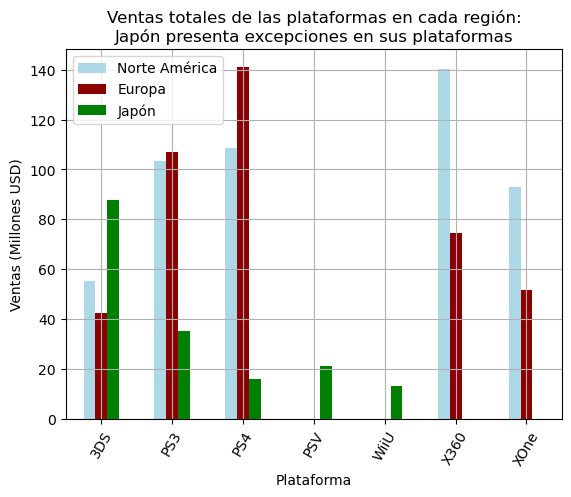

In [39]:
#Usando el método '.concat()' se unifican los dataframes de Norte América y Europa
#dado que comparten las mismas plataformas
df_plat_concat=pd.concat([dfs_plat_reg[0],dfs_plat_reg[1]], axis="columns")
#Usando el método '.merge()' unificamos el dataframe anterior con el de Japón
df_plat_merged=df_plat_concat.merge(dfs_plat_reg[2], on="platform", how="outer")
#Reemplazamos los valores ausentes por cero
df_plat_merged.fillna(0, inplace=True)
#Generamos un gráfico de barras
df_plat_merged.plot(xlabel="Plataforma", ylabel="Ventas (Millones USD)",kind="bar", color=["lightblue", "darkred", "green"], rot=60, grid=True)
#Definimos el título del gráfico
plt.title("Ventas totales de las plataformas en cada región:\nJapón presenta excepciones en sus plataformas")
#Especificamos la legenda del gráfico
plt.legend(["Norte América", "Europa", "Japón"])

Al ver las tendencias por región, podemos ver que en Norte América y Europa las plataformas coinciden con las plataformas líderes en ventas determinadas anteriormente. En Japón se presenta la excepción ya que no vemos que aparezcan las plataformas 'XOne' o 'X360'. Aparentemente, este tipo de plataformas no corresponden con las preferencias de los usuarios de este país.  

### Top 5 Géneros en cada región
Continuaremos identificando los cinco géneros con mayor cantidad de ventas en cada región durante los 5 últimos años.

In [40]:
#Se crea una lista para guardar los dataframes resultantes por región
dfs_gen_reg=[]
#Se define un ciclo for para las regiones de interés
for region,sales in regions.items():
  #Se muestra el nombre de la región
  print(region)
  #Mediante el método '.groupby()' se agrupa la información de cada género
  #Se calculan las ventas en cada plataforma dentro de la región de interés
  #Se muestran los 5 géneros con la mayor cantidad de ventas
  df_reg=df_sig.groupby("genre")[sales].sum().sort_values(ascending=False).head()
  #Se guarda el dataframe generado en la lista
  dfs_gen_reg.append(df_reg)
  #Se muestra el dataframe resultante
  print(df_reg,"\n")

North America
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64 

Europe
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64 

Japan
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64 



Para una mejor comparación, vamos a generar un gráfico para visualizar los comportamientos de ventas totales de cada plataforma en cada región.

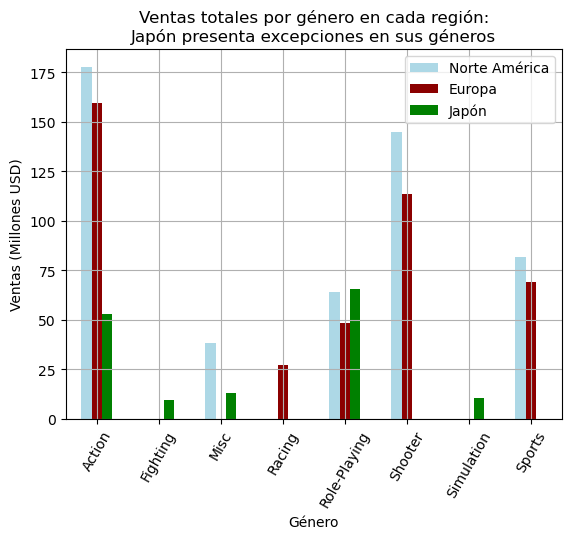

In [41]:
#Usando el método '.merge()' se unifican los dataframes de Norte América y Europa
#dado que comparten las mismas plataformas
df_gen_m=dfs_gen_reg[0].to_frame().merge(dfs_gen_reg[1], on="genre", how="outer")
#Usando el método '.merge()' unificamos el dataframe anterior con el de Japón
df_gen_merged=df_gen_m.merge(dfs_gen_reg[2], on="genre", how="outer")
#Reemplazamos los valores ausentes por cero
df_gen_merged.fillna(0, inplace=True)
#Generamos un gráfico de barras
df_gen_merged.plot(xlabel="Género", ylabel="Ventas (Millones USD)",kind="bar", color=["lightblue", "darkred", "green"], rot=60, grid=True)
#Definimos el título del gráfico
plt.title("Ventas totales por género en cada región:\nJapón presenta excepciones en sus géneros")
#Especificamos la legenda del gráfico
plt.legend(["Norte América", "Europa", "Japón"])

Otra vez, en las regiones de Norte América y Europa coinciden con casi todos los géneros dominantes del mercado como lo son Acción, Deportes, 'Shooter' y Juegos de Rol. En Japón, nuevamente podemos observar excepciones. El género preferido no es Acción, sino los juegos de Rol. Tampoco aparecen los géneros de Deportes ni 'Shooter'.

### Efectos de la clasificación ESRB en cada región
Finalmente, vamos a determinar las ventas por cada clasificación ESRB en cada región durante los últimos 5 años.

In [42]:
#Se crea una lista para guardar los dataframes resultantes por región
dfs_clas_reg=[]
#Se define un ciclo for para las regiones de interés
for region,sales in regions.items():
  #Se muestra el nombre de la región
  print(region)
  #Mediante el método '.groupby()' se agrupa la información de cada clasificación ESRB
  #Se calculan las ventas por cada clasificación dentro de la región de interés
  df_reg=df_sig.groupby("rating")[sales].sum().sort_values(ascending=False)
  #Se guarda el dataframe generado en la lista
  dfs_clas_reg.append(df_reg)
  #Se muestra el dataframe resultante
  print(df_reg,"\n")

North America
rating
M       231.57
E       114.37
E10+     75.70
T        66.02
Name: na_sales, dtype: float64 

Europe
rating
M       193.96
E       113.03
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64 

Japan
rating
E       28.33
T       26.02
M       21.20
E10+     8.19
Name: jp_sales, dtype: float64 



Para una mejor comparación, vamos a generar un gráfico para visualizar los comportamientos de ventas totales de cada plataforma en cada región.

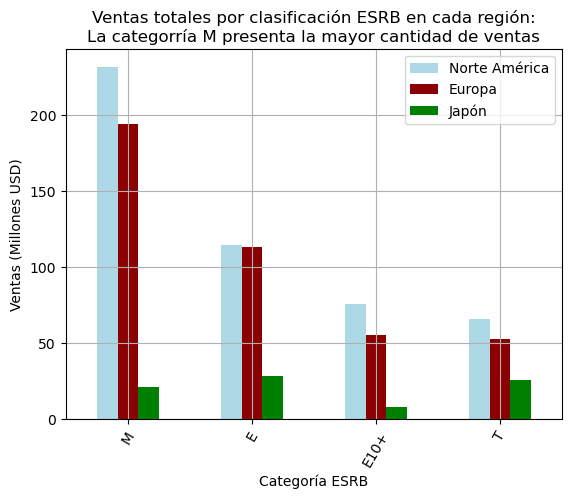

In [43]:
#Usando el método '.concat()' para unificar los dataframes dado que comparten
#las mismas categorías
df_clas_concat=pd.concat([dfs_clas_reg[0],dfs_clas_reg[1], dfs_clas_reg[2]], axis="columns")
#Generamos un gráfico de barras
df_clas_concat.plot(xlabel="Categoría ESRB", ylabel="Ventas (Millones USD)",kind="bar", color=["lightblue", "darkred", "green"], rot=60, grid=True)
#Definimos el título del gráfico
plt.title("Ventas totales por clasificación ESRB en cada región:\nLa categorría M presenta la mayor cantidad de ventas")
#Especificamos la legenda del gráfico
plt.legend(["Norte América", "Europa", "Japón"])

Las tendencias en juegos teniendo en cuenta la clasificación ESRB son similares entre Norte América y Europa. Destacan los juegos con clasificación M, seguidos de los juegos con clasificación E. Para el caso de Japón las clasificaciones E, T y M tienen valores de ventas similares.

## Pruebas de hipótesis
En la siguiente sección realizaremos pruebas de hipótesis comparando calificaciones promedio de los usuarios entre dos plataformas, y entre dos géneros. Para este análisis tendremos en cuenta los datos de los últimos 5 años.

### Calificación de los usuarios para las plataformas 'Xbox One' y 'PC'
Vamos a determinar estadísticamente si hay diferencia significativa entre los promedios de las calificaciones de los usuarios para los juegos de la plataforma 'Xbox One' y los juegos de la plataforma 'PC'. A continuación, presentamos la formulación de la prueba de hipótesis que se llevará a cabo.  

**Prueba de hipótesis.**  
**Hipótesis Nula $H_{0}$**: La calificación promedio de los usuarios de los juegos de la plataforma 'Xbox One' es igual a la calificación promedio de los usuarios de los juegos de la plataforma 'PC'.   
**Hipótesis Alternativa $H_{1}$**: La calificación promedio de los usuarios de los juegos de la plataforma 'Xbox One' es diferente a la calificación promedio de los usuarios de los juegos de la plataforma 'PC'.  
**Prueba estadística**: Prueba *t* bilateral.  
**Valor alfa**: $\alpha=0.01$

In [44]:
# Prueba de hipótesis
#H_0: Los promedios son iguales
#H_1: Los promedios son diferentes
#t-student/dos colas
#Se filtra el dataframe con la información de la plataforma 'Xone'
df_xo=df_sig[df_sig["platform"]=="XOne"]
#Se eliminan los registro con valores ausentes para realizar la prueba
df_xo=df_xo.dropna(subset=["user_score"])
#Se filtra el dataframe con la información de la plataforma 'Xone'
df_pc=df_sig[df_sig["platform"]=="PC"]
#Se eliminan los registro con valores ausentes para realizar la prueba
df_pc=df_pc.dropna(subset=["user_score"])
#Se define el valor de alpha
alpha=0.01
#Prueba t-student para los promedios de dos muestras diferentes
user_score_xopc=st.ttest_ind(df_xo["user_score"], df_pc["user_score"], equal_var=False)
#Comparación p-vlue y alpha
if user_score_xopc.pvalue<alpha:
  print("Rechaza H\N{SUBSCRIPT ZERO}")
else:
  print("No se rechaza H\N{SUBSCRIPT ZERO}")
#No hay diferencia significativa
#Los promedios no son diferentes
#user_score_xopc.pvalue

No se rechaza H₀


* De acuerdo con la prueba de hipótesis realizada, no existe una diferencia estadísticamente significativa entre los dos promedios de las calificaciones de los usuarios de los juegos de estas plataformas que nos permita rechazar la hipótesis nula $H_{0}$. Por lo tanto, no es posible afirmar que la calificación promedio de los usuarios de los juegos de la plataforma 'Xbox One' es diferente de la calificación promedio de los usuarios de los juegos de la plataforma 'PC'. Para esta prueba definimos el parámetro 'equal_var' igual a 'False', dado que no conocemos en detalle las distribuciones.  

* A partir de este resultado podemos afirmar que la plataforma a la que pertenece el juego no es un factor decisivo para su calificación respecto a los usuarios.


### Calificación de los usuarios de los géneros de Acción y Deportes
Adicionalmente, vamos a determinar estadísticamente si hay diferencia significativa entre los promedios de las calificaciones de los usuarios para los juegos del género de acción y los juegos del género de deportes. A continuación, presentamos la formulación de la prueba de hipótesis que se llevará a cabo.  

**Prueba de hipótesis.**  
**Hipótesis Nula $H_{0}$**: La calificación promedio de los usuarios de los juegos del género de acción es igual a la calificación promedio de los usuarios de los juegos del género de deportes.   
**Hipótesis Alternativa $H_{1}$**: La calificación promedio de los usuarios de los juegos del género de acción es diferente a la calificación promedio de los usuarios de los juegos del género de deportes.    
**Prueba estadística**: Prueba *t* bilateral.  
**Valor alfa**: $\alpha=0.01$

In [45]:
# Prueba de hipótesis
#H_0: Los promedios son iguales
#H_1: Los promedios son diferentes
#t-student/dos colas
#Se filtra el dataframe con la información del género de acción
df_ac=df_sig[df_sig["genre"]=="Action"]
#Se eliminan los registro con valores ausentes para realizar la prueba
df_ac=df_ac.dropna(subset=["user_score"])
#Se filtra el dataframe con la información del género de deportes
df_sp=df_sig[df_sig["genre"]=="Sports"]
#Se eliminan los registro con valores ausentes para realizar la prueba
df_sp=df_sp.dropna(subset=["user_score"])
#Se define el valor de alpha
alpha=0.01
#Prueba t-student para los promedios de dos muestras diferentes
user_score_acsp=st.ttest_ind(df_ac["user_score"], df_sp["user_score"], equal_var=False)
#Comparación p-vlue y alpha
if user_score_acsp.pvalue<alpha:
  print("Rechaza H\N{SUBSCRIPT ZERO}")
else:
  print("No se rechaza H\N{SUBSCRIPT ZERO}")
#Hay diferencia significativa
#Los promedios son diferentes
#user_score_acsp.pvalue

Rechaza H₀


* De acuerdo con la prueba de hipótesis realizada, existe una diferencia estadísticamente significativa entre los dos promedios de las calificaciones de los usuarios de los juegos de estos géneros, por lo tanto podemos rechazar la hipótesis nula $H_{0}$. De esta manera, es posible afirmar que la calificación promedio de los usuarios de los juegos del género Acción  es diferentes de la calificación promedio de los usuarios del género Deportes. Para esta prueba definimos el parámetro 'equal_var' igual a 'False', dado que no conocemos en detalle las distribuciones.  

* A partir de este resultado podemos afirmar que el género al que pertenece el juego es un factor decisivo para su calificación. Es decir, hay géneros que tienen mejor recepción por parte de los usuarios.

## Conclusiones
* A partir de los análisis por año para las plataformas nos dimos cuenta de la importancia de la vigencia que pueden tener luego de ser lanzadas al mercado. Esto nos ayudó a definir el rango de años con datos relevantes. De esta manera pudimos determinar cuáles plataformas aún se encuentran vigentes en el mercado. Con esta información, podemos definir que un juego tendrá éxito si está disponible en las plataformas más novedosas. Lo anterior nos obliga a estar enterados si plataformas como la 'PS4' será reemplazada por una nueva versión 'PS5' próximamente. De esta manera elegiremos juegos que sean compatibles con plataformas actuales y con las próximas a ser lanzadas al mercado.  

* En lo que respecta al género, vemos que tiene mucha relevancia para determinar si un juego tendrá éxito en ventas. Si el juego pertenece al género de acción podemos asegurar que tendrá buenas ventas sobre otros géneros competitivos.  

* También es necesario tener en cuenta las calificaciones de los críticos profesionales, dado que su opinión tiene efectos notables sobre la venta de los juegos reseñados.

* Teniendo en cuenta el factor regional, podemos asegurar que el juego será comprado en todas las regiones evaluadas siempre y cuando pueda ser jugado en las plataformas 'PS3' y 'PS4'. También para las regiones de Norte América y Europa en particular, si el juego también está disponible en las plataformas 'XOne' y 'X360' asegurará un éxito en ventas.   

* En cuanto a los géneros preferidos regionalmente, nuevamente establecemos como factor decisivo que el juego pertenezca al género de acción para que tenga buenas ventas. Respecto al efecto de la clasificación ESRB, el juego tendrá un mayor público si pertenece a la categoría M.

* En resumen, al analizar las tendencias en los últimos 5 años, un juego tendrá éxito en ventas durante los próximos años si pertenece al género de Acción, es clasificado en la categoría M y se encuentra disponible en las plataformas 'PS4' y 'XOne', y en sus respectivas futuras versiones por anunciarse.